# **ЗАДАНИЕ 8. ПОСТРОЕНИЕ МОДЕЛИ ARIMA**
Постройте модель ARIMA для временного ряда цен на материал 3. Рассчитайте показатели точности и адекватности построенной модели. Дайте точечный и интервальный прогнозы на 1 год вперёд по построенной модели.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import scipy.stats
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import warnings

**3. Прочитайте данные по ценам на материал 3 и приведите их к виду, пригодному для дальнейшего анализа (см. пп.1-10 Задания 1).**
**2. Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze(). Дайте ему название series.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Material 3')
data.head()

In [ ]:
dates =data.loc[data.index==0].values[0,2:]
val =data.loc[data.index==1].values[0,2:]

In [ ]:
data={'Date':dates,'Value':val}

In [ ]:
df=pd.DataFrame(data)
df.head()

In [ ]:
df=df.set_index('Date')
df.head()

In [ ]:
df.Value = df.Value.astype(float)

In [ ]:
series=df.squeeze()
type(series)

pandas.core.series.Series

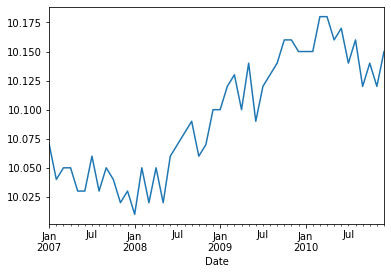

In [ ]:
series.plot()
plt.show()
# сезонности здесь нет, т.к. нет ежегодных колетаний, но тренд есть, ряд не стационарен

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 5)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


**SARIMA**

In [ ]:
lst_1 =[]
lst_2 =[]
lst_3 =[]
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(series,
      order=param,
      seasonal_order=param_seasonal,
      enforce_stationarity=False,
      enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      lst_1.append(param)
      lst_3.append(param)
      lst_3.append(results.aic)
    except:
      continue


ARIMA(0, 1, 4)x(1, 0, 3, 12)12 - AIC:-18.408633047095982
ARIMA(0, 1, 4)x(1, 0, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 1, 0, 12)12 - AIC:-96.40619453148861
ARIMA(0, 1, 4)x(1, 1, 1, 12)12 - AIC:-64.74691708305362
ARIMA(0, 1, 4)x(1, 1, 2, 12)12 - AIC:-24.540477941194318
ARIMA(0, 1, 4)x(1, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:-33.202222093936385
ARIMA(0, 1, 4)x(1, 2, 1, 12)12 - AIC:-14.20815806446485
ARIMA(0, 1, 4)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 4)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 4)x(1, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(1, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:-110.25298402901652
ARIMA(0, 1, 4)x(

In [ ]:
df_hat = pd.DataFrame(list(zip(lst_1,lst_2,lst_3)), columns=['lst_1','lst_2','lst_3'])

In [ ]:
df_hat

,lst_1,lst_2,lst_3


In [ ]:
df_hat[df_hat.lst_3 == df_hat.lst_3.min()]

,lst_1,lst_2,lst_3


In [ ]:
series

**ARIMA**

In [ ]:
lst_1 =[]
lst_3 =[]
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    try:
      mod = sm.tsa.arima.ARIMA(series, order=param)
      results = mod.fit()
      print(f'ARIMA{param} - AIC:{results.aic}')
      lst_1.append(param)
      lst_3.append(results.aic)
    except:
      continue


In [ ]:
lst_1

In [ ]:
df_hat = pd.DataFrame(list(zip(lst_1,lst_3)), columns=['lst_1','lst_3'])

In [ ]:
df_hat

In [ ]:
df_hat[df_hat.lst_3 == df_hat.lst_3.min()]

,lst_1,lst_3
8,"(0, 1, 3)",-235.738367


In [ ]:
df_hat.sort_values('lst_3')

In [ ]:
mod = sm.tsa.arima.ARIMA(series, order=(0,1,3))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5049      0.151     -3.342      0.001      -0.801      -0.209
ma.L2          0.5428      0.202      2.689      0.007       0.147       0.938
ma.L3         -0.4008      0.176     -2.282      0.022      -0.745      -0.057
sigma2         0.0003   8.58e-05      3.742      0.000       0.000       0.000


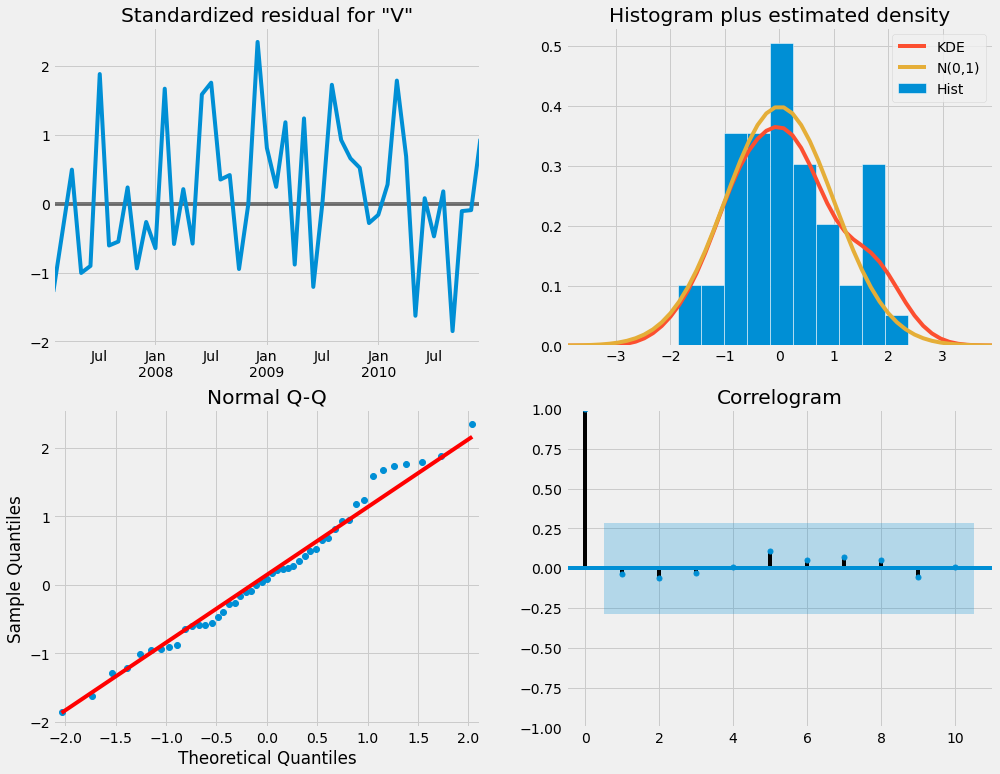

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
mod = sm.tsa.arima.ARIMA(series, order=(1,1,4))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6193      0.348      1.781      0.075      -0.062       1.301
ma.L1         -1.2607      0.294     -4.290      0.000      -1.837      -0.685
ma.L2          0.9621      0.258      3.733      0.000       0.457       1.467
ma.L3         -0.8270      0.252     -3.288      0.001      -1.320      -0.334
ma.L4          0.4988      0.183      2.728      0.006       0.140       0.857
sigma2         0.0003   9.39e-05      3.175      0.001       0.000       0.000


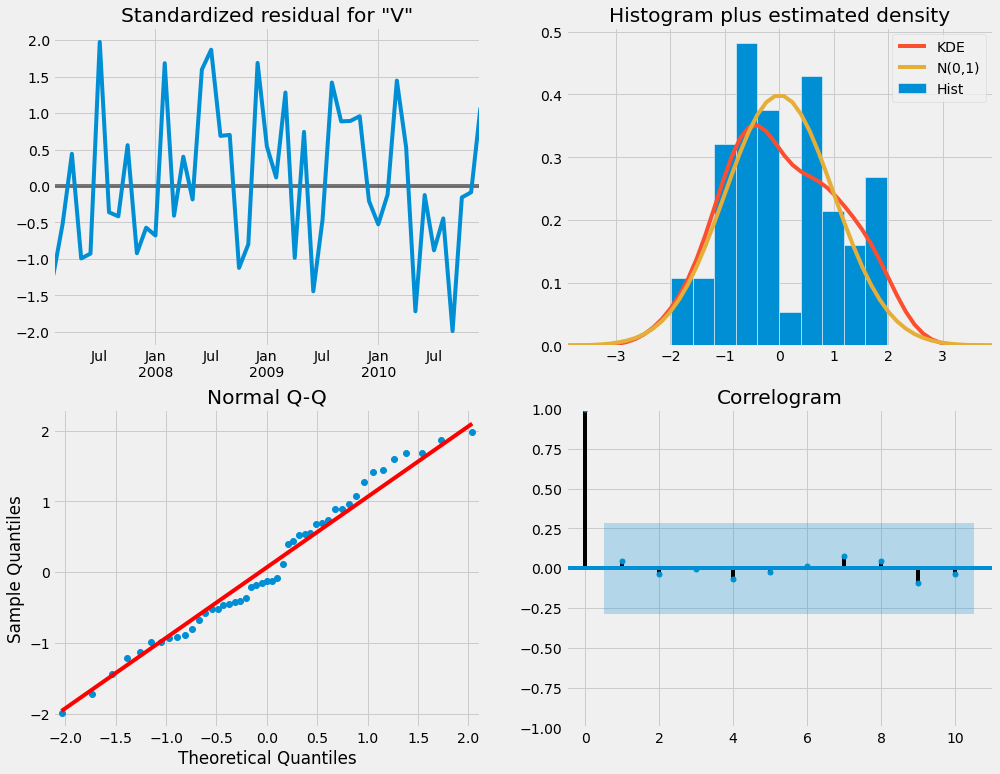

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()